In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [2]:
load_dotenv() 
Api_key = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(
    model="openai/gpt-4o-mini",
    base_url="https://openrouter.ai/api/v1",
    api_key= Api_key
)

In [3]:
class Blog_gen_State(TypedDict):
    topic: str
    outline: str
    blog_content: str
    Evaluate : str

In [4]:
def gen_outline(state : Blog_gen_State) -> Blog_gen_State:
    topic = state["topic"] 
    outline = model.invoke(f"Generate a detailed outline for a blog on the topic: {topic}").content
    state["outline"] = outline
    return state


In [5]:
def gen_blog(state : Blog_gen_State) -> Blog_gen_State:
    outline = state["outline"] 
    blog_content = model.invoke(f"Write a comprehensive blog based on the following outline in points : {outline}").content
    state["blog_content"] = blog_content
    return state

In [6]:
# bASED ON OUTLINE rATE THE BLOG AND GENERATE A SCORE <- wiork to do 
def Evaluate(state : Blog_gen_State) -> Blog_gen_State:
    outline = state['outline']
    blog_content = state["blog_content"]
    rating = f"Rate the following blog content {blog_content} based on the outline {outline} provided on a scale of 1 to 10 , also justify your rating in 50 words"
    rate_blog = model.invoke(rating).content
    state["Evaluate"] = rate_blog
    return state 

In [7]:
graph = StateGraph(Blog_gen_State)

#Nodes 
graph.add_node("gen_outline",gen_outline)
graph.add_node("gen_blog",gen_blog)
graph.add_node("Evaluate",Evaluate)

# Edges 
graph.add_edge(START,"gen_outline")
graph.add_edge("gen_outline","gen_blog")
graph.add_edge("gen_blog","Evaluate")
graph.add_edge("Evaluate",END)

workflow = graph.compile()

In [13]:
initial_state = {
    "topic" : "The impact of artificial intelligence on modern healthcare it must be 10/10 marks  (in 100 words)"
}
final_stage = workflow.invoke(initial_state)
# print(final_stage["outline"])
# print("\n")
# print(final_stage["blog_content"])
print(final_stage["Evaluate"])

I would rate the blog content an 8 out of 10. The structure is clear and organized, effectively covering key aspects of AI in healthcare. It presents relevant examples and addresses ethical concerns, enhancing the content's depth. However, it could benefit from more recent case studies and a more engaging writing style.


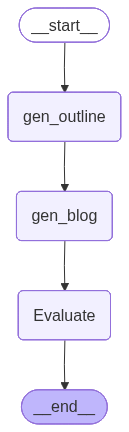

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [14]:
final_stage["blog_content"]

'# The Impact of Artificial Intelligence on Modern Healthcare\n\n## I. Introduction\n\nArtificial Intelligence (AI) in healthcare refers to the use of machine learning algorithms and software to analyze complex medical data, thereby improving diagnosis, treatment, and patient care. As the healthcare landscape evolves, AI technologies are becoming increasingly integral in the quest for more effective and efficient care. The significance of AI is underscored by its rapid growth in adoption, driven by the need for enhanced diagnostic capabilities, personalized treatment options, and streamlined operational efficiencies.\n\n## II. Enhancements in Diagnostics\n\nAI is revolutionizing the way diseases are detected and diagnosed. Through advanced algorithms, AI systems can analyze medical images, laboratory results, and patient data with remarkable precision.\n\n### A. AI Algorithms for Disease Detection\n\nAI algorithms, particularly convolutional neural networks (CNNs), have shown great pro